In [1]:
import pandas as pd

# Load the data from the u.data file (assuming it is a tab-separated file)
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# Create the ratings matrix (user-item matrix)
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')

# Display the first few rows of the ratings matrix
print(ratings_matrix.head())

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   N

In [2]:
from sklearn.model_selection import train_test_split


# train, test = train_test_split(df, test_size=0.2)
# print('train data')
# print(train.shape)
# print(train.head())
# print('test data')
# print(test.shape)
# print(test.head())

df_base=pd.read_csv('ml-100k/u1.base', sep='\t', names=column_names)
df_test=pd.read_csv('ml-100k/u1.test', sep='\t', names=column_names)

print('train data')
print(df_base.head())
print('test data')
print(df_test.head())


train data
   user_id  item_id  rating  timestamp
0        1        1       5  874965758
1        1        2       3  876893171
2        1        3       4  878542960
3        1        4       3  876893119
4        1        5       3  889751712
test data
   user_id  item_id  rating  timestamp
0        1        6       5  887431973
1        1       10       3  875693118
2        1       12       5  878542960
3        1       14       5  874965706
4        1       17       3  875073198


In [3]:
# generate the ratings matrix
print('VOTE MATRIX')
ratings_matrix = df_base.pivot(index='user_id', columns='item_id', values='rating')
print(ratings_matrix.head())

VOTE MATRIX
item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   NaN   4.0   1.0   5.0   NaN  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   N

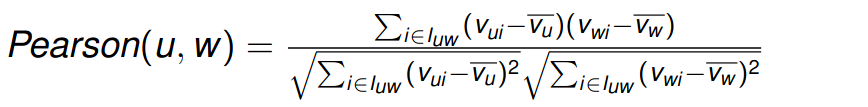

In [5]:
# how to count the number of co rated items between two users
import numpy as np
print('COUNTING CO-RATED ITEMS')
user1 = 1
user2 = 2
print((ratings_matrix.loc[user1].notna() & ratings_matrix.loc[user2].notna()).sum())
list=[]

list=((ratings_matrix.loc[user1].notna() & ratings_matrix.loc[user2].notna())[ratings_matrix.loc[user1].notna() & ratings_matrix.loc[user2].notna()].index.tolist())
print(list)


Matrix = np.identity(ratings_matrix.shape[0])
print(Matrix)
print(Matrix.shape)

def Pearson_correlation(ratings_matrix, user1, user2):
    list = ((ratings_matrix.loc[user1].notna() & ratings_matrix.loc[user2].notna())[ratings_matrix.loc[user1].notna() & ratings_matrix.loc[user2].notna()].index.tolist())
    if len(list) < 7:
        return 0
    else:
        ratings1 = ratings_matrix.loc[user1][list] # return the ratings of user1 for the items in the list
        ratings2 = ratings_matrix.loc[user2][list] # return the ratings of user2 for the items in the list
        mean1 = ratings1.mean()
        mean2 = ratings2.mean()
        num = ((ratings1 - mean1) * (ratings2 - mean2)).sum()
        den = np.sqrt(((ratings1 - mean1) ** 2).sum() * ((ratings2 - mean2) ** 2).sum())
        if den == 0:
            return 0
        else:
            return num / den

print('PEARSON CORRELATION')
print(Pearson_correlation(ratings_matrix, 2, 10))

def similraty_matrix(ratings_matrix):
    print('SIMILARITY MATRIX')
    for i in range(ratings_matrix.shape[0]):
        for j in range(i + 1, ratings_matrix.shape[0]):  # Only calculate the upper triangle (i < j)
            Matrix[i][j] = Pearson_correlation(ratings_matrix, i+1, j+1)
            Matrix[j][i] = Matrix[i][j]  # Symmetry
    return Matrix

Matrix_1=similraty_matrix(ratings_matrix)
# print(Matrix)


COUNTING CO-RATED ITEMS
6
[1, 25, 111, 127, 237, 269]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(943, 943)
PEARSON CORRELATION
0
SIMILARITY MATRIX


In [6]:
saved= np.load('similarity_matrix.npy')
print(saved)
print(saved.shape)
def top_k_neighbours(Matrix, user, k):
    # Set negative similarities to zero
    similarities = Matrix[user].copy()
    similarities[similarities < 0] = 0
    
    # Sort and return the indices of top k neighbors
    return np.argsort(-similarities)[1:k+1]  # Skip the first (self-similarity)

print('TOP K NEIGHBOURS')
print(top_k_neighbours(Matrix_1, 1, 5))


[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ...  0.21006029  0.67936622
  -0.19348921]
 [ 0.          0.          1.         ... -0.12945956  0.
   0.25943726]
 ...
 [ 0.          0.21006029 -0.12945956 ...  1.          0.63274612
  -0.02281286]
 [ 0.          0.67936622  0.         ...  0.63274612  1.
   0.        ]
 [ 0.         -0.19348921  0.25943726 ... -0.02281286  0.
   1.        ]]
(943, 943)
TOP K NEIGHBOURS
[233 192 932 914 650]


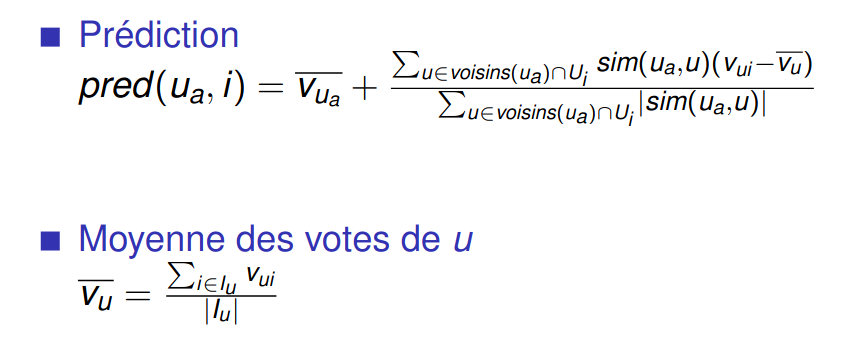

In [7]:
# predection of the rating of a user for an item
def predict_rating(ratings_matrix, similraty_matrix, user, item, k):
    # Find the top k neighbors of the user
    neighbors = top_k_neighbours(similraty_matrix, user, k)
    # Calculate the weighted sum of the ratings of the neighbors
    weighted_sum = 0
    sum_of_weights = 0
    for neighbor in neighbors:
        if not np.isnan(ratings_matrix.loc[neighbor, item]):
            weighted_sum += similraty_matrix[user, neighbor] * ratings_matrix.loc[neighbor, item]
            sum_of_weights += np.abs(similraty_matrix[user, neighbor])
    if sum_of_weights == 0:
        return 0
    else:
        return weighted_sum / sum_of_weights
def predict_rating_normalized(ratings_matrix, similraty_matrix, user, item, k):
    # Find the top k neighbors of the user
    neighbors = top_k_neighbours(similraty_matrix, user, k)
    # Calculate the weighted sum of the ratings of the neighbors
    weighted_sum = 0
    sum_of_weights = 0
    for neighbor in neighbors:
        if not np.isnan(ratings_matrix.loc[neighbor, item]):# if the item is rated by the neighbor
            weighted_sum += similraty_matrix[user, neighbor] * (ratings_matrix.loc[neighbor, item] - ratings_matrix.loc[neighbor].mean())
            sum_of_weights += np.abs(similraty_matrix[user, neighbor])
    if sum_of_weights == 0:
        return 0
    else:
        return ratings_matrix.loc[user].mean() + weighted_sum / sum_of_weights
similraty_matrix = np.load('similarity_matrix.npy')

print('PREDICTED RATING')
print(predict_rating(ratings_matrix, similraty_matrix, 2, 13, 100))
print('PREDICTED RATING NORMALIZED')
print(predict_rating_normalized(ratings_matrix, similraty_matrix, 2, 13, 100))

PREDICTED RATING
3.2825220114777847
PREDICTED RATING NORMALIZED
3.5001844272715124


In [ ]:
# item based collaborative filtering
import numpy as np
print('COUNTING CO-RATED ITEMS')
item = 1
item2 = 2
print((ratings_matrix[item].notna() & ratings_matrix[item2].notna()).sum())
list=[]
list=((ratings_matrix[item].notna() & ratings_matrix[item2].notna())[ratings_matrix[item].notna() & ratings_matrix[item2].notna()].index.tolist())
# print(list)

Matrix_item = np.identity(ratings_matrix.shape[1])
# print(Matrix_item)
print(Matrix_item.shape)

def Pearson_correlation_item(ratings_matrix, item1, item2):
    try:
        list = ((ratings_matrix[item1].notna() & ratings_matrix[item2].notna())[ratings_matrix[item1].notna() & ratings_matrix[item2].notna()].index.tolist())
        if len(list) < 7:
            return 0
        else:
            ratings1 = ratings_matrix[item1][list] # return the ratings of user1 for the items in the list
            ratings2 = ratings_matrix[item2][list] # return the ratings of user2 for the items in the list
            mean1 = ratings1.mean()
            mean2 = ratings2.mean()
            num = ((ratings1 - mean1) * (ratings2 - mean2)).sum()
            den = np.sqrt(((ratings1 - mean1) ** 2).sum() * ((ratings2 - mean2) ** 2).sum())
            if den == 0:
                return 0
            else:
                return num / den
    except:
        return 0
        
def similraty_matrix_item(ratings_matrix):
    print('SIMILARITY MATRIX')
    for i in range(ratings_matrix.shape[1]):
        for j in range(i + 1, ratings_matrix.shape[1]):  # Only calculate the upper triangle (i < j)
            Matrix_item[i][j] = Pearson_correlation_item(ratings_matrix, i+1, j+1)
            Matrix_item[j][i] = Matrix_item[i][j]  # Symmetry
    return Matrix_item
print(ratings_matrix[1])
Matrix_item_1=similraty_matrix_item(ratings_matrix)
print(Matrix_item_1)
np.save('similarity_matrix_item.npy', Matrix_item_1)


COUNTING CO-RATED ITEMS
74
(1650, 1650)
user_id
1      5.0
2      4.0
3      NaN
4      NaN
5      NaN
      ... 
939    NaN
940    NaN
941    5.0
942    NaN
943    NaN
Name: 1, Length: 943, dtype: float64
SIMILARITY MATRIX
